In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploring the Experiment's Design

### Using Groupby Analyses with Tables



#### Load Data and Get a Quick Description

```python
df.head(5), df[:5]
df.tail(5), df[-5:]
df.sample(5)
df.dtypes
df.info()
len(df)
df.columns
df['column'].nunique()
df['column'].unique()
```

In this course, we'll be working with curated data from the [Steinmetz et al, 2019](https://www.nature.com/articles/s41586-019-1787-x) paper.  

Today's data is focused on three CSV files, each containing sessions from a different stretch of data collection.  They contain trial-level data from the experiment: 
  - `steinmetz_winter2016.csv`
  - `steinmetz_summer2017.csv`
  - `steinmetz_winter2017.csv`

##### Exercises

Let's get a sense of what kind of data is in these files.  Load each of the datasets into a different variable name using the `pd.read_csv()` function, and answer the questions below!


**Example**: Load the Winter 2016 dataset and preview the first 3 rows of the data

In [2]:
df1 = pd.read_csv('./steinmetz_winter2016.csv')
df1[:3]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e


Load the Winter 2017 Dataset and preview the first 5 rows of the data

In [3]:
df2 = pd.read_csv('./steinmetz_winter2017.csv')
df2[:5]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,0.508117,1.0,0.903312,0.946524,1.0,210.0,1.0,Theiler,2017-10-11,aeb92f
1,2,True,0,100,0.5,0.678304,1.0,0.859908,0.859908,-1.0,270.0,1.0,Theiler,2017-10-11,aeb92f
2,3,True,0,100,0.5,0.508295,-1.0,0.646241,0.683098,1.0,320.0,-1.0,Theiler,2017-10-11,aeb92f
3,4,True,0,25,0.5,0.437219,-1.0,0.985264,1.022429,1.0,790.0,-1.0,Theiler,2017-10-11,aeb92f
4,5,True,100,25,0.5,0.672789,1.0,1.137715,1.175197,1.0,250.0,1.0,Theiler,2017-10-11,aeb92f


Load the Summer 2017 Dataset and preview the last 4 rows of the data

In [4]:
df3 = pd.read_csv('./steinmetz_summer2017.csv')
df3[-4:]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
2743,449,False,100,25,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2744,450,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2745,451,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2746,452,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9


Calculate the number of rows (i.e. the "length") of each of the three datasets. In this data, each row represents one trial.  Which file contained the most trials?

**Example**: N Trials, Winter 2016:

In [52]:
len(df1)

3767

N Trials, Winter 2017:

In [51]:
len(df2)

7906

N Trials, Summer 2017:

In [53]:
len(df3)

2747

Multi-session data is easiest to analyze with when each session is organized the same way, and contains the same variables.  In a table (what the `pandas` library calls a `DataFrame`), that means all the datasets have the same columns and that they store the same kind of data. 

Useful code:
  - **df.columns**
  - **df.dtypes**
  - **df.info()** 

**Exercise** 

Let's look in more detail at each of these tables' structures!

**Example**: What columns are in the Winter 2016 data?

In [54]:
df1.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

What columns are in the Winter 2017 data, and under data type is each column's data formatted as? This `dtype` is often either:
  -  a whole-number `int` value, 
  - a decimal-point `float` value, 
  - or a text-based `string` value which Pandas often lists as `object` or `'O'`

In [55]:
df2.dtypes

trial               int64
active_trials        bool
contrast_left       int64
contrast_right      int64
stim_onset        float64
gocue_time        float64
response_type     float64
response_time     float64
feedback_time     float64
feedback_type     float64
reaction_time     float64
reaction_type     float64
mouse              object
session_date       object
session_id         object
dtype: object

For the Summer 2017 data, let's get more `info`; in this case, the number of rows with non-missing data for each column.

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trial           2747 non-null   int64  
 1   active_trials   2747 non-null   bool   
 2   contrast_left   2747 non-null   int64  
 3   contrast_right  2747 non-null   int64  
 4   stim_onset      2747 non-null   float64
 5   gocue_time      2017 non-null   float64
 6   response_type   2017 non-null   float64
 7   response_time   2017 non-null   float64
 8   feedback_time   2017 non-null   float64
 9   feedback_type   2017 non-null   float64
 10  reaction_time   2017 non-null   float64
 11  reaction_type   2017 non-null   float64
 12  mouse           2747 non-null   object 
 13  session_date    2747 non-null   object 
 14  session_id      2747 non-null   object 
dtypes: bool(1), float64(8), int64(3), object(3)
memory usage: 303.3+ KB


#### Merging the Datasets

Having three different variables that contain similar data makes it harder for us to analyze our data.  Let's concatenate the data into a single table to use for the rest of this analysis.  The following line of code is helpful here:

```python
df = pd.concat(
    [dataset1, dataset2],   # A list of variables referencing DataFrmaes
    ignore_index=True,  # Recalculate the row number labels.
)
```

**Exercise**: Concatenate the three tables into a single one.

In [63]:
df = pd.concat([df1, df2, df3]);

How many trials are in the entire dataset?

In [66]:
len(df)

14420

Are the same columns still in this dataset?

In [67]:
df.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

### Calculating Sizes of

In [68]:
df.size

216300

How many sessions are in the entire dataset?

In [65]:
df['session_id'].nunique()

39

In [49]:
df1['session_id'].nunique()

11

In [41]:
df1['session_id'].nunique()

11

Multi-session data is easiest to work with when each session is organized the same way.  In a table (what the `pandas` library calls a `DataFrame`), that means all the datasets have the same columns. 

Do all three files contain the same columns?

In [38]:
(df1.columns == df2.columns).all(), (df2.columns == df3.columns).all()

(True, True)

In [16]:
df.describe(include=["O"]).round(2)

,mouse,session_date,session_id
count,14420,14420,14420
unique,10,31,39
top,Lederberg,2017-12-06,2bb71d
freq,2902,831,557


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trial           10050 non-null  int32  
 1   contrast_left   10050 non-null  int8   
 2   contrast_right  10050 non-null  int8   
 3   stim_onset      10050 non-null  float64
 4   gocue_time      10050 non-null  float64
 5   response_type   10050 non-null  float64
 6   response_time   10050 non-null  float64
 7   feedback_time   10050 non-null  float64
 8   feedback_type   10050 non-null  float64
 9   reaction_time   10050 non-null  float64
 10  reaction_type   10050 non-null  float64
 11  mouse           10050 non-null  object 
 12  session_date    10050 non-null  object 
 13  session_id      10050 non-null  object 
dtypes: float64(8), int32(1), int8(2), object(3)
memory usage: 922.7+ KB


In [7]:
df.dtypes

trial               int32
contrast_left        int8
contrast_right       int8
stim_onset        float64
gocue_time        float64
response_type     float64
response_time     float64
feedback_time     float64
feedback_type     float64
reaction_time     float64
reaction_type     float64
mouse              object
session_date       object
session_id         object
dtype: object

## Experiment Description: Sizes

```python
len(df)
df.columns
df['column'].nunique()
df['column'].unique()
```

How Many Total Trials are there?

In [16]:
len(df)

10050

What columns are there in this dataset?

In [20]:
df.columns

Index(['trial', 'contrast_left', 'contrast_right', 'stim_onset', 'gocue_time',
       'response_type', 'response_time', 'feedback_time', 'feedback_type',
       'reaction_time', 'reaction_type', 'mouse', 'session_date',
       'session_id'],
      dtype='object')

How many columns are there in the dataset?

In [21]:
len(df.columns)

14

How many sessions (count the session ids)

In [17]:
df['session_id'].nunique()

39

How many mice?

In [6]:
df['mouse'].nunique()

10

What were the names of the mice?

In [7]:
df['mouse'].unique()

array(['Cori', 'Muller', 'Radnitz', 'Moniz', 'Hench', 'Theiler',
       'Richards', 'Forssmann', 'Lederberg', 'Tatum'], dtype=object)

How many different contrast levels are there for the left stimulus?

In [8]:
df['contrast_left'].nunique()

4

What are the different contrast levels for the left stimulus?

In [9]:
df['contrast_left'].unique()

array([100,   0,  50,  25], dtype=int8)

What were the different feedback_types?

In [10]:
df['feedback_type'].unique()

array([ 1., -1.])

What were the different response types?

In [24]:
df['response_type'].unique()

array([ 1., -1.,  0.])

### Basic Statistics on Columns

What was the minimum response time?

In [48]:
df['response_time'].min()

0.47941449767444055

What was the maximum response time across all the trials?

In [47]:
df['response_time'].max()

2.713576095788426

What was the mean response time?  

In [46]:
df['response_time'].mean()

1.4228323570687085

What was the median response time?

In [50]:
df['response_time'].median()


1.1833335596579744

Plot a histogram of the response times.

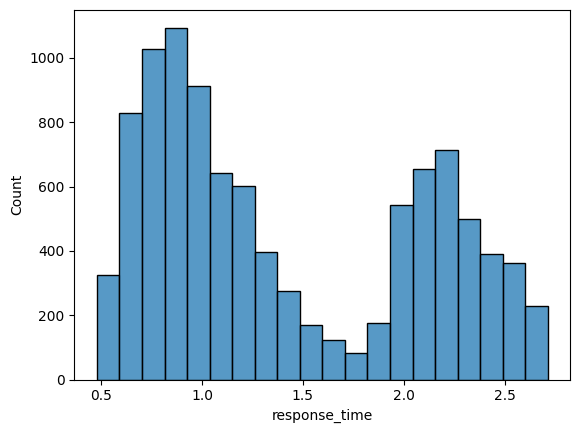

In [57]:
sns.histplot(df['response_time']);

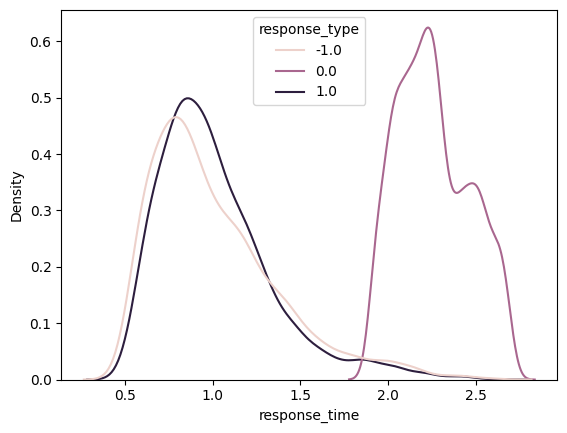

In [79]:
sns.kdeplot(data=df, x='response_time', hue='response_type');

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


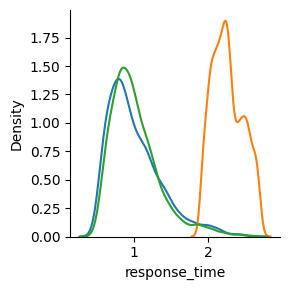

In [77]:
g = sns.FacetGrid(data=df, hue='response_type')
g.map_dataframe(sns.kdeplot, 'response_time', );

This dataset also contains a variable called `reaction_times`.  What are the min, max, mean, and median of this variable?  Is there anything unusual about this variable?

In [65]:
(
df['reaction_time'].min(),
df['reaction_time'].max(),
df['reaction_time'].mean(),
df['reaction_time'].median(),
)

(0.0, inf, inf, 460.0)

Plot a histogram of the reaction times.

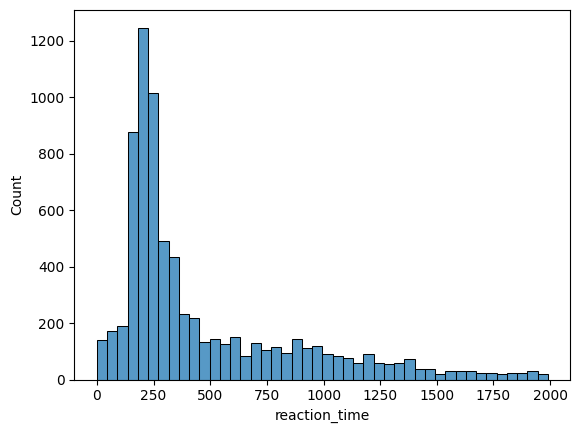

In [66]:
sns.histplot(df['reaction_time']);

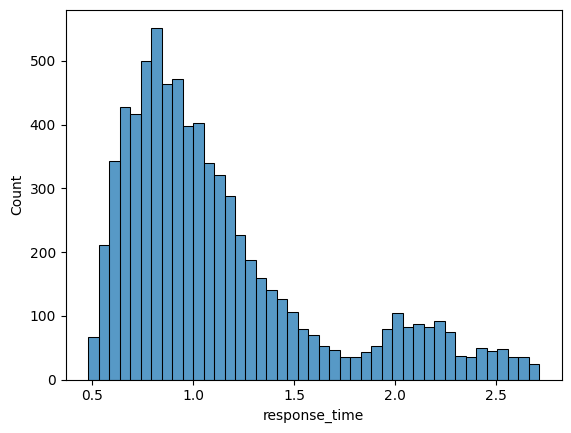

In [38]:
sns.histplot(df[mask].response_time);

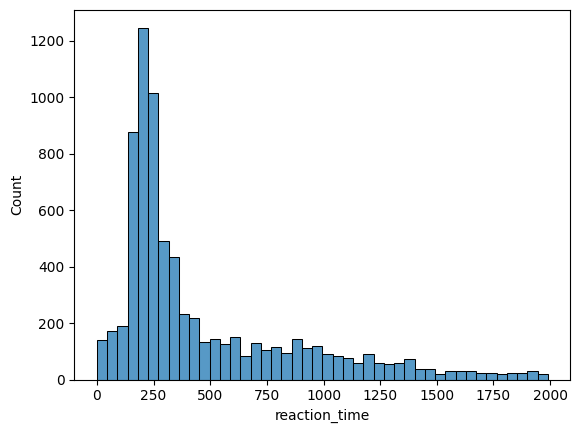

In [37]:
sns.histplot(df[mask].reaction_time);

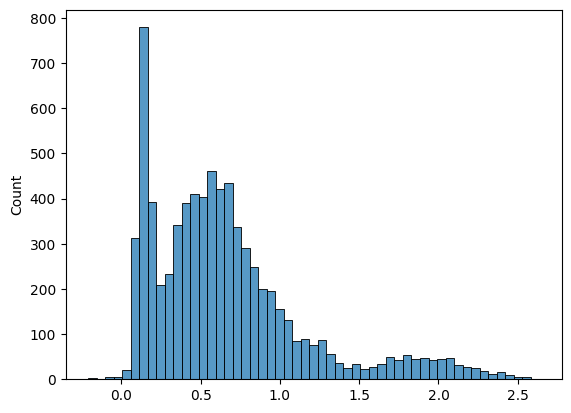

In [42]:
sns.histplot(df[mask].response_time - (df[mask].reaction_time / 1000));

In [43]:
(df[mask].response_time > (df[mask].reaction_time / 1000)).mean()

0.9983940042826552

In [45]:
(df[mask].response_type == df[mask].reaction_type).mean()

0.8162473233404711

In [35]:
mask = df.reaction_time != np.inf
df[mask]['reaction_time'].mean(), df[mask]['response_time'].mean()

(475.1365096359743, 1.1373064435496212)

## Experiment Description: Statistics on Counts

```python
df.groupby('column').size()
df.groupby('column').size().sort_index()
df.groupby('column').size().mean()
df.groupby('column').size().median()
df.groupby('column').size().min()
df.groupby('column').size().max()
df.groupby('column').size().std()
df.groupby('column').size().plot.bar()
df.groupby('column').size().plot.line()
```

How many trials did each mouse perform?

In [14]:
df.groupby('mouse').size()

mouse
Cori          693
Forssmann    1045
Hench        1411
Lederberg    2132
Moniz         606
Muller        782
Radnitz       962
Richards     1127
Tatum         949
Theiler       343
dtype: int64

How many trials were in each session?

In [15]:
df.groupby('session_id').size()

session_id
0206f3    142
06d7a5    191
0bb71d    444
0bbaa1    280
166d73    128
184ce1    143
19d103    253
1ff779    249
2bb71d    447
42bcae    224
47d60f    311
4a93b2    187
4f2dea    251
571617    260
5dd41e    214
5f365d    300
6788a7    237
74469d    124
7875a5    404
7c7123    181
83c308    261
8f15c5    316
96a48e    290
a69dfa    178
a8f871    372
aadac0    199
aeb92f    343
b34dbd    268
b38573    252
b6481c    235
b8aea4    340
cdb38d    250
d5ef5b    254
d67ad3    228
dc83da    258
dd9ee9    342
e93982    247
f4d600    296
fd552a    151
dtype: int64

What was the mean number of trials in each session?

In [16]:
df.groupby('session_id').size().mean()

257.6923076923077

What was the minimum number of trials in a session?

In [17]:
df.groupby('session_id').size().min()

124

What was the maximum number of trials in a session?

In [18]:
df.groupby('session_id').size().max()

447

How many trials were there of each contrast_left level?

In [19]:
df.groupby('contrast_left').size()

contrast_left
0      4630
25     1560
50     1576
100    2284
dtype: int64

Make a bar plot showing how many trials there were for each contrast_right level.

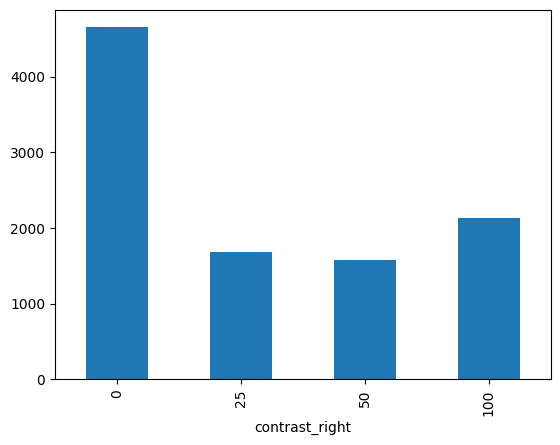

In [20]:
df.groupby('contrast_right').size().plot.bar();

Make a line plot showing how many trials there were for each contrast_left level.

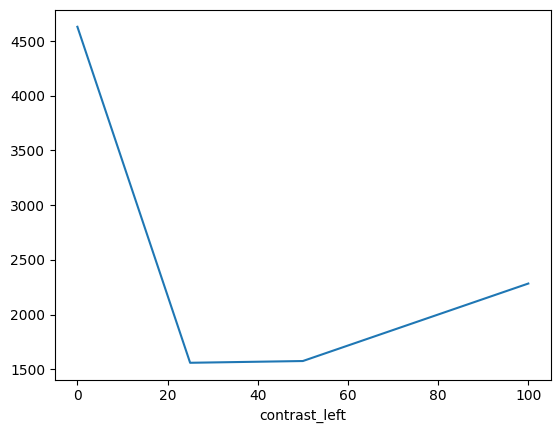

In [21]:
df.groupby('contrast_left').size().plot.line();

Which plot type would you say is best for this information?  Why?

## Experiment Description: Bivariate

```python
df.groupby('column1')['column2'].unique()
df.groupby('column1')['column2'].nunique()
df.groupby(['column1', 'column2']).size()
df.groupby(['column1', 'column2'])['column3'].mean()
df.groupby(['column1', 'column2'])['column3'].median()
df.groupby(['column1', 'column2'])['column3'].median().reset_index()

crosstab = df.groupby(['column1', 'column2'])['column3'].median().unstack()
crosstab.T
crosstab.style.background_gradient(axis=None)
plt.imshow(crosstab); plt.colorbar();
sns.heatmap(crosstab, annot=True, fmt='d');
```

How many sessions did each mouse do?

In [18]:
df.groupby('mouse')['session_id'].nunique()

mouse
Cori         3
Forssmann    4
Hench        4
Lederberg    7
Moniz        3
Muller       3
Radnitz      5
Richards     5
Tatum        4
Theiler      1
Name: session_id, dtype: int64

Make a bar plot showing how many sessions each mouse did.

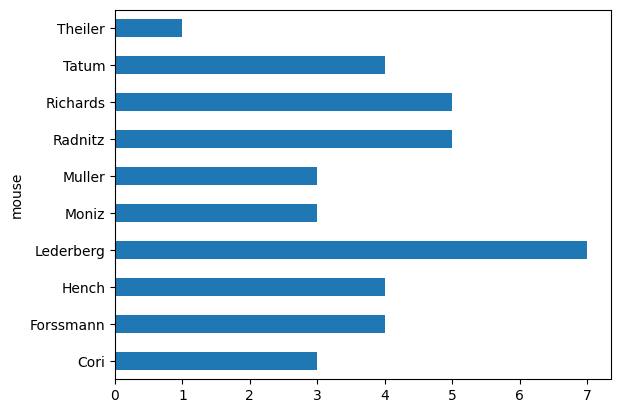

In [19]:
df.groupby('mouse')['session_id'].nunique().plot.barh();

Which session ids did each mouse do?

In [24]:
df.groupby('mouse')['session_id'].unique()

mouse
Cori                                  [5dd41e, 4f2dea, d67ad3]
Forssmann                     [1ff779, d5ef5b, 96a48e, b38573]
Hench                         [cdb38d, a8f871, 2bb71d, dd9ee9]
Lederberg    [b8aea4, 5f365d, b34dbd, 7875a5, 0bbaa1, 42bca...
Moniz                                 [e93982, b6481c, 74469d]
Muller                                [0bb71d, fd552a, 4a93b2]
Radnitz               [83c308, a69dfa, 19d103, 0206f3, 166d73]
Richards              [184ce1, 6788a7, 571617, 06d7a5, f4d600]
Tatum                         [47d60f, dc83da, 7c7123, aadac0]
Theiler                                               [aeb92f]
Name: session_id, dtype: object

How many trials were their of each combination of contrast_left and contrast_right levels?

In [25]:
df.groupby(['contrast_left', 'contrast_right']).size()

contrast_left  contrast_right
0              0                 2649
               25                 348
               50                 688
               100                945
25             0                  323
               25                 225
               50                 342
               100                670
50             0                  737
               25                 318
               50                 226
               100                295
100            0                  944
               25                 797
               50                 322
               100                221
dtype: int64

Make a bar plot

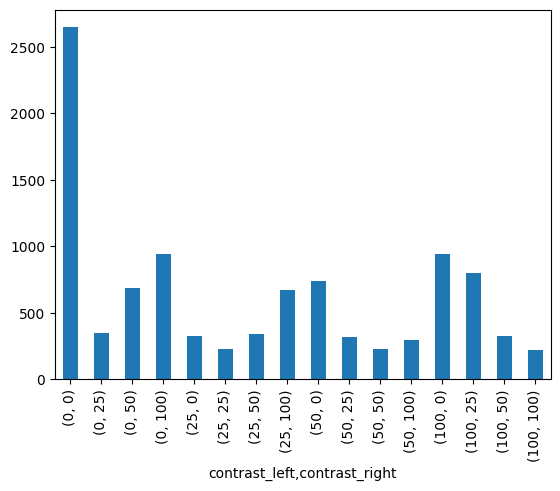

In [26]:
df.groupby(['contrast_left', 'contrast_right']).size().plot.bar();

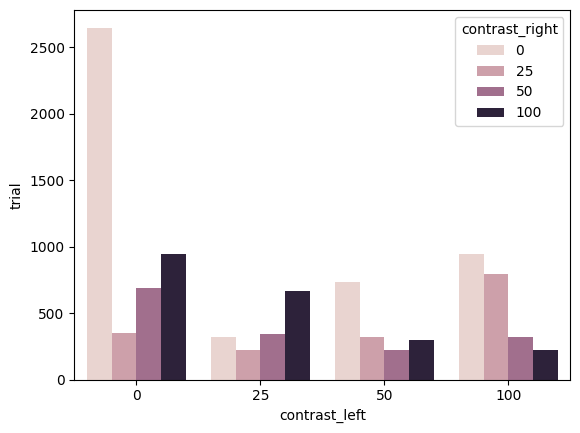

In [27]:
dd = df.groupby(['contrast_left', 'contrast_right'])['trial'].size().reset_index()
sns.barplot(data=dd, x='contrast_left', hue='contrast_right', y='trial');

Using `groupby` and `unstack`, make a cross-tabulation showing the number of contrast_left and contrast_right trials

In [28]:
crosstab = df.groupby(['contrast_left', 'contrast_right']).size().unstack()
crosstab

contrast_right,0,25,50,100
contrast_left,,,,
0,2649,348,688,945
25,323,225,342,670
50,737,318,226,295
100,944,797,322,221


Make the cross-table colorful, by adding a background gradient style to it!

In [29]:
crosstab.style.background_gradient(axis=None)

contrast_right,0,25,50,100
contrast_left,,,,
0,2649,348,688,945
25,323,225,342,670
50,737,318,226,295
100,944,797,322,221


Use the `plt.imshow` function to plot the cross-table dataframe as a heatmap. (optional: add a colorbar to the plot by calling the `plt.colorbar` function on the next line after making the heatmap.)

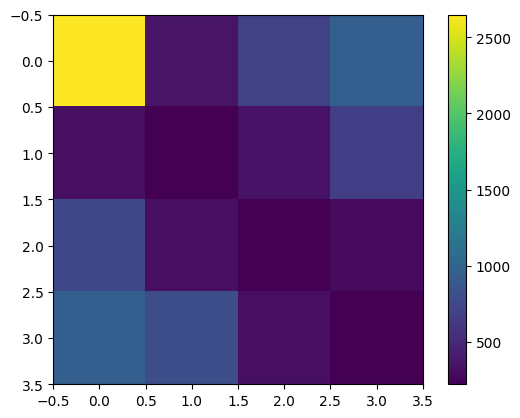

In [30]:
plt.imshow(crosstab);
plt.colorbar();

Let's have seaborn make a nicer heatmap, by calling the `sns.heatmap` function on the cross-table dataframe.

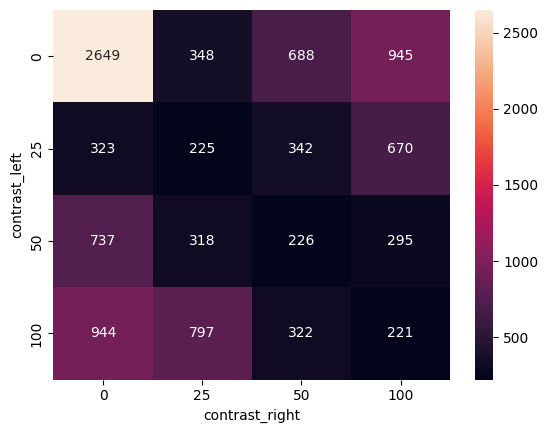

In [31]:
sns.heatmap(crosstab, annot=True, fmt='d');